In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
from pyvi import ViTokenizer # pip install pyvi

### Đọc văn bản

In [2]:
f = open('data/TruyenKieu.txt', encoding='utf-8')
data = f.read()
f.close()

In [5]:
data[:1000]

'Trăm năm trong cõi người ta,\xa0\nChữ tài chữ mệnh khéo là ghét nhau.\xa0\nTrải qua một cuộc bể dâu,\xa0\nNhững điều trông thấy mà đau đớn lòng.\xa0\nLạ gì bỉ sắc tư phong,\xa0\nTrời xanh quen thói má hồng đánh ghen.\xa0\nCảo thơm lần giở trước đèn,\xa0\nPhong tình cổ lục còn truyền sử xanh.\xa0\nRằng: Năm Gia-tĩnh triều Minh,\xa0\nBốn phương phẳng lặng hai kinh chữ vàng.\xa0\nCó nhà viên ngoại họ Vương,\xa0\nGia tư nghỉ cũng thường thường bậc trung.\xa0\nMột trai con thứ rốt lòng,\xa0\nVương Quan là chữ nối dòng nho gia.\xa0\nĐầu lòng hai ả tố nga,\xa0\nThúy Kiều là chị em là Thúy Vân.\xa0\nMai cốt cách tuyết tinh thần,\xa0\nMỗi người một vẻ mười phân vẹn mười.\xa0\nVân xem trang trọng khác vời,\xa0\nKhuôn trăng đầy đặn nét ngài nở nang.\xa0\nHoa cười ngọc thốt đoan trang,\xa0\nMây thua nước tóc tuyết nhường màu da.\xa0\nKiều càng sắc sảo mặn mà,\xa0\nSo bề tài sắc lại là phần hơn.\xa0\nLàn thu thủy nét xuân sơn,\xa0\nHoa ghen thua thắm liễu hờn kém xanh.\xa0\nMột hai nghiêng nước ng

In [ ]:
print(data[:1000])

### Tiền xử lý

In [6]:
data = data.replace('\xa0','').replace('\n','')

In [7]:
data[:1000]

'Trăm năm trong cõi người ta,Chữ tài chữ mệnh khéo là ghét nhau.Trải qua một cuộc bể dâu,Những điều trông thấy mà đau đớn lòng.Lạ gì bỉ sắc tư phong,Trời xanh quen thói má hồng đánh ghen.Cảo thơm lần giở trước đèn,Phong tình cổ lục còn truyền sử xanh.Rằng: Năm Gia-tĩnh triều Minh,Bốn phương phẳng lặng hai kinh chữ vàng.Có nhà viên ngoại họ Vương,Gia tư nghỉ cũng thường thường bậc trung.Một trai con thứ rốt lòng,Vương Quan là chữ nối dòng nho gia.Đầu lòng hai ả tố nga,Thúy Kiều là chị em là Thúy Vân.Mai cốt cách tuyết tinh thần,Mỗi người một vẻ mười phân vẹn mười.Vân xem trang trọng khác vời,Khuôn trăng đầy đặn nét ngài nở nang.Hoa cười ngọc thốt đoan trang,Mây thua nước tóc tuyết nhường màu da.Kiều càng sắc sảo mặn mà,So bề tài sắc lại là phần hơn.Làn thu thủy nét xuân sơn,Hoa ghen thua thắm liễu hờn kém xanh.Một hai nghiêng nước nghiêng thành,Sắc đành đòi một tài đành họa hai.Thông minh vốn sẵn tính trời,Pha nghề thi họa đủ mùi ca ngâm.Cung thương làu bậc ngũ âm,Nghề riêng ăn đứt hồ c

In [8]:
data[-1000:]

'chăn gối cũng ngoài cầm thơ.Khi chén rượu khi cuộc cờ,Khi xem hoa nở khi chờ trăng lên.Ba sinh đã phỉ mười nguyền,Duyên đôi lứa cũng là duyên bạn bầy.Nhớ lời, lập một am mây,Khiến người thân tín rước thầy Giác Duyên.Đến nơi đóng cửa cài then,Rêu trùm kẽ ngạch cỏ lên mái nhà,Sư đà hái thuốc phương xa,Mây bay hạc lánh biết là tìm đâu?Nặng vì chút nghĩa bấy lâu,Trên am cứ giữ hương dầu hôm mai.Một nhà phúc lộc gồm hai,Nghìn năm dằng dặc quan giai lần lần.Thừa gia chẳng hết nàng Vân,Một cây cù mộc một sân quế hòe.Phong lưu phú quý ai bì,Vườn xuân một cửa để bia muôn đời.Ngẫm hay muôn sự tại trời,Trời kia đã bắt làm người có thân.Bắt phong trần phải phong trần,Cho thanh cao mới được phần thanh cao.Có đâu thiên vị người nào,Chữ tài chữ mệnh dồi dào cả hai,Có tài mà cậy chi tài,Chữ tài liền với chữ tai một vần.Đã mang lấy nghiệp vào thân,Cũng đừng trách lẫn trời gần trời xa.Thiện căn ở tại lòng ta,Chữ tâm kia mới bằng ba chữ tài.Lời quê chắp nhặt dông dài,Mua vui cũng được một vài trống canh

In [9]:
char_lst = ['.',',','!',':','?']
for ch in char_lst:
    data = data.replace(ch,' ')

In [10]:
data = data.lower()

In [11]:
data[:1000]

'trăm năm trong cõi người ta chữ tài chữ mệnh khéo là ghét nhau trải qua một cuộc bể dâu những điều trông thấy mà đau đớn lòng lạ gì bỉ sắc tư phong trời xanh quen thói má hồng đánh ghen cảo thơm lần giở trước đèn phong tình cổ lục còn truyền sử xanh rằng  năm gia-tĩnh triều minh bốn phương phẳng lặng hai kinh chữ vàng có nhà viên ngoại họ vương gia tư nghỉ cũng thường thường bậc trung một trai con thứ rốt lòng vương quan là chữ nối dòng nho gia đầu lòng hai ả tố nga thúy kiều là chị em là thúy vân mai cốt cách tuyết tinh thần mỗi người một vẻ mười phân vẹn mười vân xem trang trọng khác vời khuôn trăng đầy đặn nét ngài nở nang hoa cười ngọc thốt đoan trang mây thua nước tóc tuyết nhường màu da kiều càng sắc sảo mặn mà so bề tài sắc lại là phần hơn làn thu thủy nét xuân sơn hoa ghen thua thắm liễu hờn kém xanh một hai nghiêng nước nghiêng thành sắc đành đòi một tài đành họa hai thông minh vốn sẵn tính trời pha nghề thi họa đủ mùi ca ngâm cung thương làu bậc ngũ âm nghề riêng ăn đứt hồ c

In [12]:
data = ViTokenizer.tokenize(data) # https://pypi.org/project/pyvi/

In [13]:
data[:1000]

'trăm năm trong cõi người_ta chữ tài chữ mệnh khéo là ghét nhau trải qua một cuộc bể_dâu những điều trông thấy mà đau_đớn lòng lạ gì bỉ sắc tư phong trời xanh quen_thói má hồng đánh_ghen cảo thơm lần giở trước đèn phong_tình cổ lục còn truyền sử_xanh rằng năm gia - tĩnh triều minh bốn_phương phẳng_lặng hai kinh chữ vàng có nhà viên_ngoại họ vương gia_tư nghỉ cũng thường thường bậc trung một trai con_thứ rốt lòng vương quan là chữ nối dòng nho gia đầu_lòng hai ả tố nga thúy kiều là chị_em là thúy vân mai cốt_cách tuyết tinh_thần mỗi người một_vẻ mười phân vẹn mười vân xem trang_trọng khác vời khuôn trăng đầy_đặn nét ngài nở_nang hoa cười ngọc thốt đoan_trang mây thua nước tóc tuyết nhường màu_da_kiều càng sắc_sảo mặn mà so bề tài_sắc lại là phần hơn làn thu thủy_nét xuân sơn hoa ghen thua thắm liễu hờn kém xanh một_hai nghiêng nước nghiêng thành sắc đành đòi một tài đành_họa hai thông_minh vốn sẵn tính trời pha nghề thi_họa đủ mùi ca ngâm cung thương làu bậc ngũ_âm nghề riêng ăn_đứt hồ_

In [14]:
file = open('files/vietnamese-stopwords.txt', 'r', encoding="utf8")
stopwords_lst = file.read().split('\n')
file.close()

In [15]:
stopwords_lst[:10]

['a_lô',
 'a_ha',
 'ai',
 'ai_ai',
 'ai_nấy',
 'ai_đó',
 'alô',
 'amen',
 'anh',
 'anh_ấy']

In [16]:
lst = ['Ao','Thu','lanh','leo','nuoc','trong','veo']
lst

['Ao', 'Thu', 'lanh', 'leo', 'nuoc', 'trong', 'veo']

In [17]:
' '.join(lst)

'Ao Thu lanh leo nuoc trong veo'

In [18]:
data = ' '.join('' if word in stopwords_lst else word for word in data.split())

In [19]:
data[:1000]

'trăm   cõi người_ta chữ tài chữ mệnh khéo  ghét  trải    bể_dâu   trông   đau_đớn  lạ  bỉ sắc tư phong trời xanh quen_thói má hồng đánh_ghen cảo thơm  giở  đèn phong_tình cổ lục  truyền sử_xanh   gia - tĩnh triều minh bốn_phương phẳng_lặng hai kinh chữ vàng   viên_ngoại  vương gia_tư nghỉ    bậc trung  trai con_thứ rốt  vương quan  chữ nối dòng nho gia đầu_lòng hai ả tố nga thúy kiều  chị_em  thúy vân mai cốt_cách tuyết tinh_thần   một_vẻ mười phân vẹn mười vân  trang_trọng  vời khuôn trăng đầy_đặn nét ngài nở_nang hoa cười ngọc  đoan_trang mây thua  tóc tuyết nhường màu_da_kiều  sắc_sảo mặn   bề tài_sắc     làn thu thủy_nét xuân sơn hoa ghen thua thắm liễu hờn kém xanh một_hai nghiêng  nghiêng thành sắc đành đòi  tài đành_họa hai thông_minh vốn sẵn  trời pha nghề thi_họa  mùi ca ngâm cung thương làu bậc ngũ_âm nghề  ăn_đứt hồ_cầm  trương khúc   lựa  chương  thiên_bạc mệnh   não nhân phong_lưu rất_mực hồng quần xuân_xanh xấp_xỉ  tuần cập kê £ m đềm trướng rủ màn che tường đông ong bướ

In [20]:
data = re.sub(r'\s+', ' ', data)

In [21]:
data[:1000]

'trăm cõi người_ta chữ tài chữ mệnh khéo ghét trải bể_dâu trông đau_đớn lạ bỉ sắc tư phong trời xanh quen_thói má hồng đánh_ghen cảo thơm giở đèn phong_tình cổ lục truyền sử_xanh gia - tĩnh triều minh bốn_phương phẳng_lặng hai kinh chữ vàng viên_ngoại vương gia_tư nghỉ bậc trung trai con_thứ rốt vương quan chữ nối dòng nho gia đầu_lòng hai ả tố nga thúy kiều chị_em thúy vân mai cốt_cách tuyết tinh_thần một_vẻ mười phân vẹn mười vân trang_trọng vời khuôn trăng đầy_đặn nét ngài nở_nang hoa cười ngọc đoan_trang mây thua tóc tuyết nhường màu_da_kiều sắc_sảo mặn bề tài_sắc làn thu thủy_nét xuân sơn hoa ghen thua thắm liễu hờn kém xanh một_hai nghiêng nghiêng thành sắc đành đòi tài đành_họa hai thông_minh vốn sẵn trời pha nghề thi_họa mùi ca ngâm cung thương làu bậc ngũ_âm nghề ăn_đứt hồ_cầm trương khúc lựa chương thiên_bạc mệnh não nhân phong_lưu rất_mực hồng quần xuân_xanh xấp_xỉ tuần cập kê £ m đềm trướng rủ màn che tường đông ong bướm mặc xuân én thoi thiều quang chín chục sáu mươi cỏ no

### Đếm từ

In [22]:
from collections import Counter

In [23]:
dic = Counter(data.split())

In [24]:
dic

Counter({'trăm': 32,
         'cõi': 6,
         'người_ta': 7,
         'chữ': 35,
         'tài': 24,
         'mệnh': 13,
         'khéo': 14,
         'ghét': 2,
         'trải': 2,
         'bể_dâu': 1,
         'trông': 55,
         'đau_đớn': 5,
         'lạ': 16,
         'bỉ': 2,
         'sắc': 11,
         'tư': 6,
         'phong': 13,
         'trời': 79,
         'xanh': 31,
         'quen_thói': 1,
         'má': 10,
         'hồng': 58,
         'đánh_ghen': 1,
         'cảo': 2,
         'thơm': 3,
         'giở': 10,
         'đèn': 14,
         'phong_tình': 2,
         'cổ': 2,
         'lục': 6,
         'truyền': 10,
         'sử_xanh': 1,
         'gia': 21,
         '-': 13,
         'tĩnh': 2,
         'triều': 7,
         'minh': 9,
         'bốn_phương': 3,
         'phẳng_lặng': 1,
         'hai': 60,
         'kinh': 14,
         'vàng': 62,
         'viên_ngoại': 3,
         'vương': 22,
         'gia_tư': 1,
         'nghỉ': 4,
         'bậc': 8,
        

In [25]:
dic.most_common(10) # 10 từ xuất hiện nhiều nhất

[('nàng', 199),
 ('hoa', 121),
 ('chẳng', 106),
 ('tình', 84),
 ('trời', 79),
 ('đường', 77),
 ('thân', 77),
 ('chàng', 74),
 ('mặt', 66),
 ('duyên', 64)]

In [27]:
from wordcloud import WordCloud

In [28]:
# instantiate a word cloud object
wc = WordCloud(
    background_color='white',
    max_words=1000
)
# generate the word cloud
wc.generate(data);

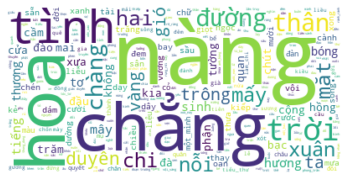

In [29]:
# display the word clouds
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()